In [1]:
import pandas as pd
from libmlops.data.data_loading import explore_dataset

data = []
# Create lists for x, y, and z
for x in range(130):
    for y in range(130):
        data.append([x / 10, y / 10, (x / 10) * (y / 10)])

# Create a DataFrame from the dictionary
dataset = pd.DataFrame(data, columns=["x", "y", "z"])
# explore_dataset(dataset, show_ui=True)
dataset

,x,y,z
0,0.0,0.0,0.00
1,0.0,0.1,0.00
2,0.0,0.2,0.00
3,0.0,0.3,0.00
4,0.0,0.4,0.00
...,...,...,...
16895,12.9,12.5,161.25
16896,12.9,12.6,162.54
16897,12.9,12.7,163.83
16898,12.9,12.8,165.12


In [2]:
from libmlops.data.data_preprocessing import get_xy
from libmlops.features.feature_selection import convert_indices
from libmlops.utils.regressor_evaluation import features_evaluation
from libmlops.utils.features_evaluation import keep_features

X, Y = get_xy(dataset)
features = features_evaluation(X, Y, verbose=True)
features = convert_indices(dataset, features)
print(features)
dataset_reduced = keep_features(dataset, features)

dataset_reduced.head()

LINR [1] [0. 1.]
RDG [1] [0. 1.]
LSO [0] [1. 0.]
ELN [0] [1. 0.]
DTR [1] [0. 1.]
RFR [1] [0. 1.]
SVR [0] [1. 0.]
KNR [1] [0. 1.]
GBR [0] [1. 0.]
[1, 0]
['x', 'y']


,x,y
0,0.0,0.0
1,0.0,0.1
2,0.0,0.2
3,0.0,0.3
4,0.0,0.4


In [3]:
from numpy import set_printoptions
from libmlops.features.feature_evaluation import (
    get_feature_importance,
    get_k_best_features,
    get_recursive_feature_elimination,
    get_linear_regression,
    get_decision_tree,
)

set_printoptions(precision=2)
# print("get_feature_importance", get_feature_importance(X, Y, verbose=False))
print("get_k_best_features", get_k_best_features(X, Y, verbose=False))
# print(
#     "get_recursive_feature_elimination",
#     get_recursive_feature_elimination(X, Y, verbose=False),
# )
print("get_linear_regression", get_linear_regression(X, Y, verbose=False))
print("get_decision_tree", get_decision_tree(X, Y, verbose=False))

get_k_best_features [0. 0.]
get_linear_regression [0. 1.]
get_decision_tree [0. 1.]


LINR: -10.566113 (0.275152)
RDG: -10.566113 (0.275152)
LSO: -10.568307 (0.277025)
ELN: -10.598377 (0.282254)
DTR: -0.457999 (0.008851)
RFR: -0.102532 (0.003742)
SVR: -10.566891 (0.272547)
KNR: -0.199142 (0.005470)
GBR: -0.946416 (0.027741)


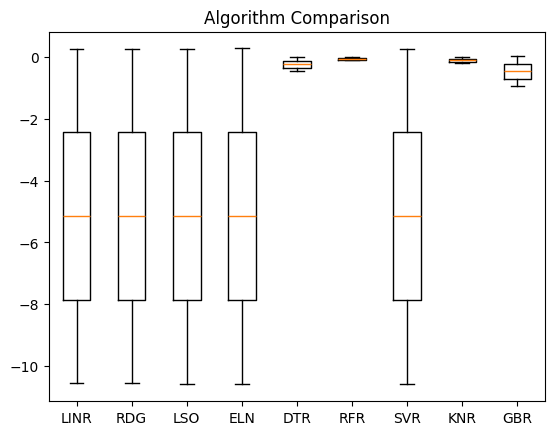

In [4]:
from libmlops.utils.regressor_evaluation import (
    algorithm_evaluation,
    compare_algorithms,
)

X = dataset_reduced
Y = dataset[["z"]]
results, names = algorithm_evaluation(X, Y, verbose=True)
compare_algorithms(results, names)

In [5]:
from libmlops.data.data_loading import save_datasets
from libmlops.data.data_preprocessing import split_train_test_xy


X_train, X_validation, Y_train, Y_validation = split_train_test_xy(X, Y, random_state=1)
save_datasets(
    [X_train, X_validation, Y_train, Y_validation],
    ["X_train", "X_validation", "Y_train", "Y_validation"],
    save_path="../data/processed",
)

In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from libmlops.data.data_loading import load_datasets
from libmlops.models.model_loading import load_models, save_models
from libmlops.models.model_training import train_model

LOAD_MODEL = False
print("Loading training datasets")
[X_train, Y_train] = load_datasets(
    ["X_train", "Y_train"], save_path="../data/processed/"
)
model = []
model_name = "finalised_model"
if LOAD_MODEL:
    print("Loading previous model")
    [model] = load_models(model_name, save_path="../data/processed/")
if model == []:
    print("Does not exist - creating new model")
    model = RandomForestRegressor(n_jobs=-1)
    # model = KNeighborsRegressor(n_jobs=-1)
    print("Saving model")
    save_models(model, model_name, save_path="../data/processed/")

print("Training model")
train_model(model, X_train, Y_train.values.ravel())
print("Saving model")
save_models(model, model_name, save_path="../data/processed/")

Loading training datasets
Does not exist - creating new model
Saving model
Training model
Saving model


In [7]:
from libmlops.data.data_loading import load_datasets
from libmlops.models.model_loading import load_models
from libmlops.utils.regressor_evaluation import model_evaluation

print("Loading validation datasets")
[X_validation, Y_validation] = load_datasets(
    ["X_validation", "Y_validation"], save_path="../data/processed/"
)

print("Loading previous model")
model_name = "finalised_model"
[model] = load_models(model_name, save_path="../data/processed/")

print("Evaluating model")
r2, mae, cv_results_mean, cv_results_std = model_evaluation(
    model, X_validation, Y_validation
)
print("R-squared (coefficient of determination) regression score: ", r2)
print("Mean Absolute Error:", mae)
print("Cross-validation: %f Mean (%f Standard)" % (cv_results_mean, cv_results_std))

Loading validation datasets
Loading previous model
Evaluating model
R-squared (coefficient of determination) regression score:  0.999970192452848
Mean Absolute Error: 0.12560884615384635
Cross-validation: -0.414517 Mean (0.030354 Standard)


In [8]:
import pandas as pd

print("Loading previous model")
model_name = "finalised_model"
[model] = load_models(model_name, save_path="../data/processed/")

names = [
    "x",
    "y",
]
data = [[1, 1], [2, 2], [4, 4], [8, 8], [12, 12]]

df = pd.DataFrame(data, columns=names)

df

Loading previous model


,x,y
0,1,1
1,2,2
2,4,4
3,8,8
4,12,12


In [9]:
if features != []:
    df_new = keep_features(df, features)
    print(features, df_new.columns)

df_new

['x', 'y'] Index(['x', 'y'], dtype='object')


,x,y
0,1,1
1,2,2
2,4,4
3,8,8
4,12,12


In [10]:
for index, row in df_new.iterrows():
    # test the model with 1 row
    print(
        index, row.values, model.predict(pd.DataFrame([row.values], columns=row.index))
    )

0 [1 1] [0.98]


1 [2 2] [3.98]
2 [4 4] [16.]
3 [8 8] [64.07]
4 [12 12] [143.92]
